<a href="https://colab.research.google.com/github/SreyasiNath/Handwritten-assamese-character-recognition/blob/main/AssameHCC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/newdtaset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [42]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import utils
from keras import layers
from keras import utils as np_utils
#from utils import to_categorical
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/newdtaset'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:25]

['/content/drive/MyDrive/newdtaset/bdo/116.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/109.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/113.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/1.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/107.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/117.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/106.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/103.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/118.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/112.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/104.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/102.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/101.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/115.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/119.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/10.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/114.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/111.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/105.jpg',
 '/content/drive/MyDrive/newdtaset/bdo/100.jpg',
 '/content/drive/MyDriv

In [43]:
train=pd.DataFrame()
train=train.assign(filename=Id)

In [44]:
root_path='newdtaset'
dd=os.listdir(root_path)
dd

['nisnso', 'glo', 'tno', 'pro', 'bdo', 'sto', 'ndro', 'shro', 'niojnjo', 'klo']

In [45]:
from pathlib import Path
from sklearn import preprocessing

dir_path = r'/content/drive/MyDrive/newdtaset'
image_link=[]
for path in os.listdir(dir_path):
   image_link.append(path)
image_link = list(Path(r'/content/drive/MyDrive/newdtaset').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [46]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df['label'] = image_label

In [47]:
df

,link,name,label
0,/content/drive/MyDrive/newdtaset/bdo/116.jpg,bdo,0
1,/content/drive/MyDrive/newdtaset/bdo/109.jpg,bdo,0
2,/content/drive/MyDrive/newdtaset/bdo/113.jpg,bdo,0
3,/content/drive/MyDrive/newdtaset/bdo/1.jpg,bdo,0
4,/content/drive/MyDrive/newdtaset/bdo/107.jpg,bdo,0
...,...,...,...
2380,/content/drive/MyDrive/newdtaset/tno/96.jpg,tno,9
2381,/content/drive/MyDrive/newdtaset/tno/51.jpg,tno,9
2382,/content/drive/MyDrive/newdtaset/tno/58.jpg,tno,9
2383,/content/drive/MyDrive/newdtaset/tno/77.jpg,tno,9


<Axes: >

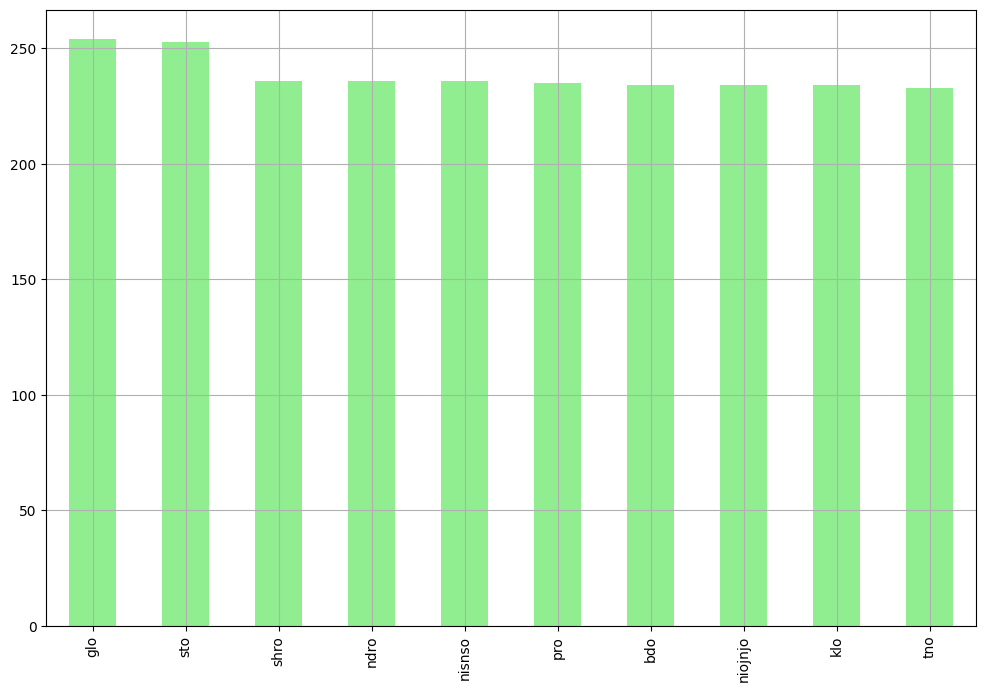

In [48]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8), grid = True, color = 'lightgreen')

In [49]:
df.shape

(2385, 3)

In [50]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_gen=ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdtaset",target_size=(256,256),batch_size=32,class_mode='categorical',shuffle=True, subset='training')

valid_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdtaset", target_size=(256,256),batch_size=32,shuffle=True,subset='validation')

test_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdtaset",target_size=(256,256),batch_size=32,shuffle=True,subset='validation')

Found 2151 images belonging to 10 classes.
Found 234 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


In [51]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(10,activation='sigmoid'))

# # We used different layers to train the neural network by importing keras library from tensorflow framework
# # for input and hidden neurons we use the most widly used activation function which is relu where as for output neurons we uses softmax activation function
# model=tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(256,256,3)),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(512,activation='relu'),
#     keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(256,activation='relu'),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(32,activation='relu'),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(10,activation='softmax'),

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)
# model.compile(optimizer=optimizer,
#              loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])
# model.summary()
# # model_history=train_model(model=model,epochs=600,optimizer='adam')


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)     

In [53]:

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [54]:
History= model.fit_generator(
          steps_per_epoch=30,
          generator=train_data,
          validation_data=valid_data,
          epochs=25,shuffle=True)

<ipython-input-54-2b11c37550d9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History= model.fit_generator(


Epoch 1/25
30/30 [==============================] - 7s 198ms/step - loss: 1.9930 - accuracy: 0.2909 - val_loss: 1.5618 - val_accuracy: 0.4615
Epoch 2/25
30/30 [==============================] - 6s 207ms/step - loss: 1.1765 - accuracy: 0.6000 - val_loss: 1.0280 - val_accuracy: 0.6111
Epoch 3/25
30/30 [==============================] - 8s 267ms/step - loss: 0.5798 - accuracy: 0.8073 - val_loss: 0.6057 - val_accuracy: 0.8120
Epoch 4/25
30/30 [==============================] - 4s 122ms/step - loss: 0.3366 - accuracy: 0.9027 - val_loss: 0.6907 - val_accuracy: 0.7735
Epoch 5/25
30/30 [==============================] - 5s 155ms/step - loss: 0.2704 - accuracy: 0.9144 - val_loss: 0.4633 - val_accuracy: 0.8504
Epoch 6/25
30/30 [==============================] - 4s 123ms/step - loss: 0.2304 - accuracy: 0.9333 - val_loss: 0.3665 - val_accuracy: 0.8889
Epoch 7/25
30/30 [==============================] - 4s 139ms/step - loss: 0.1119 - accuracy: 0.9636 - val_loss: 0.4050 - val_accuracy: 0.8932
Epoch 

In [55]:
#evaluate model
score=model.evaluate(test_data,verbose=0)
print("test loss",score[0])
print("test accuracy",score[1])

test loss 0.43435341119766235
test accuracy 0.8717948794364929


In [56]:
import matplotlib.pyplot as plt

def plot_loss(History):
    # Plot training and validation loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(History):
    # Plot training and validation accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



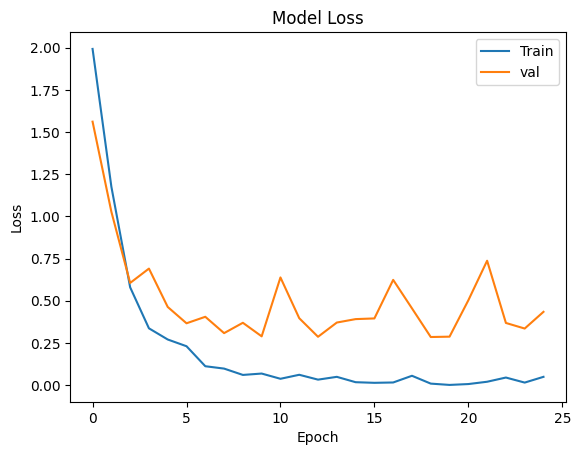

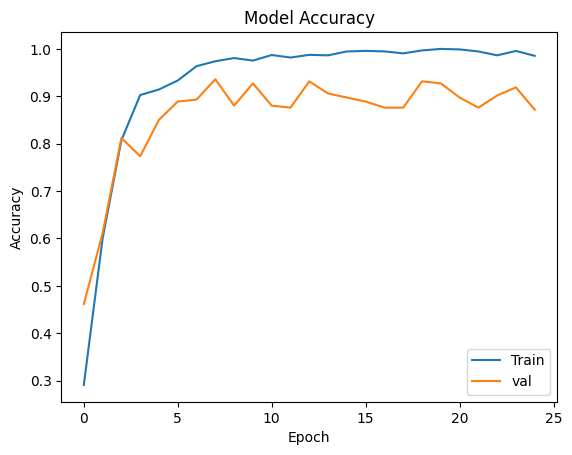

In [57]:
import matplotlib.pyplot as plt
plot_loss(History)
plot_accuracy(History)

In [58]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.1)

test_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/newdtaset',
    target_size=(256, 256),
    batch_size= 64,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 234 images belonging to 10 classes.


In [59]:
# Get the true labels for the test data
true_labels = test_data.classes

In [60]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [61]:
predicted_labels = model.predict(test_data)

4/4 [==============================] - 5s 967ms/step


In [62]:
predicted_labels = np.argmax(predicted_labels, axis=1)

In [63]:
predicted_labels

array([4, 2, 2, 3, 7, 1, 3, 3, 5, 3, 4, 9, 0, 0, 0, 2, 3, 3, 9, 2, 3, 3,
       7, 3, 0, 0, 7, 8, 7, 9, 1, 2, 8, 6, 2, 0, 4, 3, 4, 2, 2, 4, 6, 0,
       0, 0, 8, 2, 2, 4, 3, 0, 3, 3, 0, 0, 8, 0, 4, 1, 8, 2, 5, 4, 8, 3,
       3, 3, 0, 6, 3, 8, 0, 0, 2, 3, 3, 6, 3, 1, 1, 2, 0, 8, 8, 2, 3, 8,
       8, 3, 7, 4, 4, 3, 8, 8, 7, 3, 2, 0, 4, 1, 2, 8, 7, 3, 9, 9, 7, 0,
       1, 2, 2, 2, 3, 4, 3, 8, 8, 3, 8, 5, 3, 0, 1, 3, 8, 2, 2, 2, 0, 2,
       6, 8, 6, 9, 8, 8, 0, 9, 4, 0, 6, 2, 3, 6, 3, 0, 3, 6, 0, 2, 9, 9,
       6, 2, 2, 7, 2, 1, 3, 3, 3, 3, 3, 2, 7, 3, 4, 2, 4, 2, 3, 4, 8, 0,
       9, 9, 3, 2, 7, 2, 4, 3, 9, 8, 2, 3, 4, 2, 9, 8, 3, 1, 0, 2, 5, 8,
       9, 0, 6, 2, 3, 3, 2, 3, 1, 3, 3, 3, 8, 8, 8, 2, 3, 3, 2, 3, 3, 3,
       7, 6, 5, 8, 9, 9, 2, 3, 3, 0, 8, 4, 6, 6])

In [64]:
import matplotlib.pyplot as plt

In [65]:
# Get a few images from the test set
num_images = 10
test_images, test_labels = next(test_data)



In [66]:
from sklearn.metrics import accuracy_score

# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

#Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
# # Calculate the accuracy
# accuracy =accuracy_score(true_labels, predicted_labels)
# print("Predicted accuracy: {:.2f}%".format(accuracy * 100))


4/4 [==============================] - 4s 994ms/step - loss: 3.1058 - accuracy: 0.5085
Test Loss: 3.1057844161987305
Test Accuracy: 0.5085470080375671


In [67]:
# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]



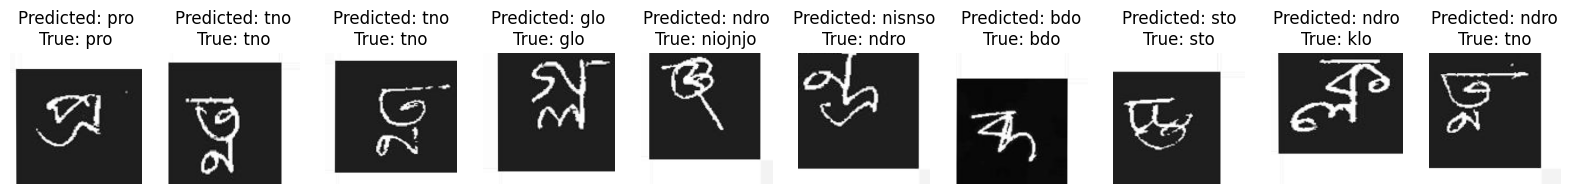

In [68]:
# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [71]:
# from sklearn.metrics import classification_report, confusion_matrix
# # Generate the classification report
# print(classification_report(true_labels, predicted_labels))

from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:num_samples]
predicted_labels = predicted_labels[:num_samples]

# Generate the classification report
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.60      0.43      0.50         7
           2       0.43      0.43      0.43         7
           3       0.33      0.57      0.42         7
           4       1.00      0.88      0.93         8
           5       0.67      0.29      0.40         7
           6       0.75      0.43      0.55         7
           7       1.00      0.50      0.67         2
           8       0.29      1.00      0.44         2
           9       0.80      0.57      0.67         7

    accuracy                           0.61        64
   macro avg       0.66      0.61      0.59        64
weighted avg       0.68      0.61      0.61        64



In [72]:

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  0]
 [ 2  3  2  0  0  0  0  0  0  0]
 [ 0  0  3  3  0  0  0  0  0  1]
 [ 0  0  0  4  0  1  0  0  2  0]
 [ 0  0  0  1  7  0  0  0  0  0]
 [ 1  0  0  3  0  2  0  0  1  0]
 [ 0  2  0  0  0  0  3  0  2  0]
 [ 0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  2  1  0  0  0  0  0  4]]
